
#### Cork Institute of Technology

### MSc in Data Science and Analytics

## Applied Machine Learning 
## Project 1 Assignment

#### Givaldo Francisco S Jr

R00182595




### -----------------------------------------------------------------------------------------------------------------------------------------------------

### Importing packeges 

In [104]:
import sys
import nltk
import sklearn
import pandas
import numpy
import pandas as pd
import numpy as np
import codecs


### This function is used to remove duplicates emails

In [105]:


def Remove_dup_lines(text):

    lines_seen = set() # holds lines already seen
    #outfile = open("out.txt", "w")
    for line in text:
        if line not in lines_seen: # not a duplicate
            #outfile.write(line)
            lines_seen.add(line)
            
    return lines_seen

### Importing list of ham and spam 

In [106]:
import os
ham = os.listdir('enron1/ham/')
spam = os.listdir('enron1/spam/')


### this code open files from spam and put it in "data" variable

In [107]:
data = pd.DataFrame(columns=[0,1])

spam_text = pd.DataFrame(columns=[0,1])
ham_text = pd.DataFrame(columns=[0,1])   

for i in range(0,len(spam)):
    #print('enron1/ham/'+ham[i])
    with open('enron1/spam/'+spam[i], 'r', errors='ignore') as f:
        data = data.append({0: "spam",1:(f.read())}, ignore_index=True) 
            
      

In [108]:
print(len(data[1])-len(Remove_dup_lines(data[1]))," Duplicated spam email")

37  Duplicated spam email


### this code open files from ham and add it in "data" variable


In [109]:
for i in range(0,len(ham)):
    #print('enron1/ham/'+ham[i])
    with open('enron1/ham/'+ham[i], 'r', errors='ignore') as f:
        data = data.append({0: "ham",1:(f.read())}, ignore_index=True)  

In [110]:
print(len(data[1])-len(Remove_dup_lines(data[1]))," Duplicated ham email")

178  Duplicated ham email


### separating email from spam and ham

In [111]:
spam_text=data[data[0]=='spam']
ham_text=data[data[0]=='ham']

### converting in data frame

In [112]:
df_spam = pd.DataFrame(spam_text)
df_ham = pd.DataFrame(ham_text)

In [113]:
df_ham.count()

0    3672
1    3672
dtype: int64

### counting words from each email and get average words - BEFORE CLEAN

In [114]:
Size_spam_email=[]

for i in spam_text[1]:
    Size_spam_email.append(len(i))
   
print(pd.DataFrame(Size_spam_email)[0].mean()," spam Words in average")

1203.6293333333333  spam Words in average


In [115]:
Size_ham_email=[]

for i in ham_text[1]:
    Size_ham_email.append(len(i))
   
print(pd.DataFrame(Size_ham_email)[0].mean()," ham Words in average")   

959.3929738562091  ham Words in average


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5CB4E8D00>]],
      dtype=object)

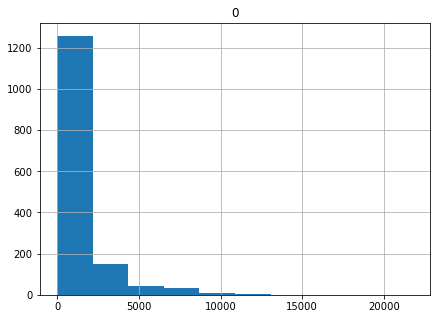

In [116]:
X=pd.DataFrame(Size_spam_email)
X.hist(column=0, figsize=(7,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5CAF8BA60>]],
      dtype=object)

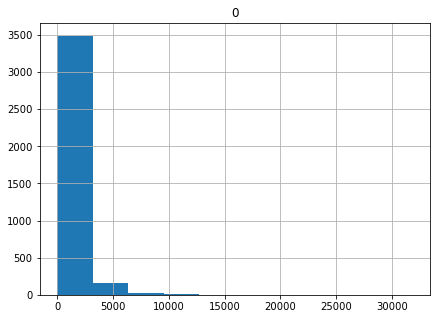

In [117]:
X=pd.DataFrame(Size_ham_email)
X.hist(column=0, figsize=(7,5))


### spam has more words by email in average

## 1. Getting data and mixing it

In [118]:
df = pd.DataFrame(data)

In [119]:
from sklearn.utils import shuffle
df = shuffle(df)


In [120]:
# print useful information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5172 entries, 1365 to 3677
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5172 non-null   object
 1   1       5172 non-null   object
dtypes: object(2)
memory usage: 121.2+ KB
None
         0                                                  1
1365  spam  Subject: bigger is better\nyour woman needs an...
1894   ham  Subject: wells\ndaren , i think i may have los...
2111   ham  Subject: re : sitara release ( re : changes in...
2470   ham  Subject: hpl noms for june 15 , 2000\n( see at...
4927   ham  Subject: re : entex may 2001\nhoward ,\ncan yo...


In [121]:
# check class distribution
classes = df[0]
print(classes.value_counts())

ham     3672
spam    1500
Name: 0, dtype: int64


### 2. Preprocess the Data

  

In [122]:
from sklearn.preprocessing import LabelEncoder

# turn ham and spam in categorical values 0 and 1
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

print(Y[:10])

[1 0 0 0 0 1 0 0 1 1]


In [123]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [124]:
# store the SMS message data
messages = df[1]
print(messages[:10])

1365    Subject: bigger is better\nyour woman needs an...
1894    Subject: wells\ndaren , i think i may have los...
2111    Subject: re : sitara release ( re : changes in...
2470    Subject: hpl noms for june 15 , 2000\n( see at...
4927    Subject: re : entex may 2001\nhoward ,\ncan yo...
1362    Subject: from brand names to generics , from o...
4493    Subject: air products - plant down for 4 days ...
5152    Subject: netco items\nwanted to share the late...
661     Subject: vlagra : discreet , no prescription ,...
1350    Subject: whats the word . order your prescr - ...
Name: 1, dtype: object


### Cleaning data

This functions will clean simbols, letters, sotp words and numbers.
It will help on classification


In [125]:
import codecs
import re
from math import log
import time
import matplotlib.pyplot as plt
plt.rcdefaults
import numpy as np
PRINT_DEBUG = False

def clean_number(text):   
    for i in range(0,10):
        text = text.str.replace(str(i),'')               
    return text


def clean_string(the_string):
    # TODO try better regex later
    the_clean_string = the_string.str.replace(r"[\;\?\<\>\,\"\|\:\.\`\~\{\}\\\/@$\%\[\]\(\)\^\-\+\&#\*\!\_\=]*", "")
    the_clean_string = the_clean_string.str.replace(r'[^\w\d\s]', ' ')
    the_clean_string = the_clean_string.str.replace(r'^\s+|\s+?$', '')
    the_clean_string = the_clean_string.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','')
    the_clean_string = the_clean_string.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','')
    the_clean_string = the_clean_string.str.replace(r'subject','')
    # Remove punctuation
    the_clean_string = the_clean_string.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    the_clean_string = the_clean_string.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    the_clean_string = the_clean_string.str.replace(r'^\s+|\s+?$', '')
    
    return the_clean_string

Call functions


In [126]:

message_cleaned = clean_string(messages.str.lower())
message_cleaned = clean_number(message_cleaned.str.lower())

In [127]:
len(message_cleaned)

5172

In [128]:
#message_cleaned=(Remove_dup_lines(message_cleaned))

In [129]:
spam_text = clean_string(spam_text[1].str.lower())
spam_text = clean_number(spam_text.str.lower())

In [130]:
ham_text = clean_string(ham_text[1].str.lower())
ham_text = clean_number(ham_text.str.lower())

### Importing nltk stopwords package

In [131]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gival\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

message_cleaned = message_cleaned.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))



In [133]:
spam_text= spam_text.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [134]:
ham_text= ham_text.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [135]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

message_cleaned = message_cleaned.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [136]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

spam_words = spam_text.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [137]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

ham_words = ham_text.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

### 3. Generating Features

For this purpose, it will be necessary to tokenize each word. 

In [138]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gival\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [139]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in message_cleaned:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [140]:
from nltk.tokenize import word_tokenize

# create bag-of-words
spam_w = []

for message in spam_words:
    Swords = word_tokenize(message)
    for w in Swords:
        spam_w.append(w)
        
spam_words = nltk.FreqDist(spam_w)

In [141]:
from nltk.tokenize import word_tokenize

# create bag-of-words
ham_w = []

for message in ham_words:
    Swords = word_tokenize(message)
    for w in Swords:
        ham_w.append(w)
        
ham_words = nltk.FreqDist(ham_w)

In [142]:
spam_words

FreqDist({'com': 993, 'http': 984, 'compani': 921, 'price': 732, 'e': 631, 'www': 587, 'get': 556, 'inform': 556, 'font': 515, 'email': 514, ...})

In [143]:
ham_words

FreqDist({'ect': 13897, 'hou': 7281, 'enron': 6555, 'deal': 3549, 'ga': 2895, 'pleas': 2737, 'meter': 2718, 'com': 2717, 'cc': 2379, 'pm': 2325, ...})

In [144]:
all_words.most_common(30)

[('ect', 13908),
 ('hou', 7289),
 ('enron', 6555),
 ('com', 3710),
 ('deal', 3655),
 ('pleas', 3245),
 ('ga', 3072),
 ('meter', 2721),
 ('cc', 2391),
 ('pm', 2343),
 ('hpl', 2318),
 ('thank', 2305),
 ('need', 2081),
 ('e', 1969),
 ('daren', 1901),
 ('forward', 1833),
 ('price', 1813),
 ('corp', 1776),
 ('volum', 1691),
 ('know', 1618),
 ('day', 1549),
 ('get', 1504),
 ('new', 1437),
 ('compani', 1432),
 ('mmbtu', 1408),
 ('product', 1403),
 ('may', 1384),
 ('chang', 1354),
 ('j', 1336),
 ('inform', 1296)]

In [145]:
spam_words.most_common(30)

[('com', 993),
 ('http', 984),
 ('compani', 921),
 ('price', 732),
 ('e', 631),
 ('www', 587),
 ('get', 556),
 ('inform', 556),
 ('font', 515),
 ('email', 514),
 ('pleas', 508),
 ('td', 504),
 ('secur', 502),
 ('statement', 497),
 ('invest', 476),
 ('us', 470),
 ('stock', 467),
 ('product', 463),
 ('time', 449),
 ('new', 434),
 ('may', 423),
 ('nbsp', 418),
 ('one', 405),
 ('use', 385),
 ('p', 384),
 ('look', 371),
 ('offer', 366),
 ('height', 363),
 ('pill', 357),
 ('need', 351)]

In [146]:
ham_words.most_common(30)

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('deal', 3549),
 ('ga', 2895),
 ('pleas', 2737),
 ('meter', 2718),
 ('com', 2717),
 ('cc', 2379),
 ('pm', 2325),
 ('hpl', 2318),
 ('thank', 2125),
 ('daren', 1901),
 ('need', 1730),
 ('corp', 1710),
 ('volum', 1668),
 ('forward', 1608),
 ('know', 1458),
 ('mmbtu', 1408),
 ('e', 1338),
 ('j', 1300),
 ('day', 1292),
 ('chang', 1242),
 ('nom', 1185),
 ('attach', 1169),
 ('farmer', 1139),
 ('contract', 1129),
 ('let', 1104),
 ('price', 1081),
 ('xl', 1035)]

In [147]:
df = pd.DataFrame(all_words.most_common(1000)) #[10:30]
df=df.sort_values(by=1, ascending=True)

In [148]:
df_spam = pd.DataFrame(spam_words.most_common(1000)) #[10:30]
df_spam=df_spam.sort_values(by=1, ascending=True)

In [149]:
df_ham = pd.DataFrame(ham_words.most_common(1000)) #[10:30]
df_ham=df_ham.sort_values(by=1, ascending=True)

### Get commum words between spam and ham

In [150]:
df_s = pd.DataFrame(spam_words.most_common(1000)) #[10:30]
df_s=df_s.sort_values(by=1, ascending=True)
df_h = pd.DataFrame(ham_words.most_common(1000)) #[10:30]
df_h=df_h.sort_values(by=1, ascending=True)

#intersected_df = pd.merge(df_ham[0], df_spam[0], how='inner')
words=set(df_s[0]) & set(df_h[0])

In [151]:
# commum words between spam and ham
len(words)

471

### find the frequency of each word

In [152]:
spam_in=[]
ham_in=[]

for i in range(0,len(df_spam[0])):    
    if(df_spam[0][i] in words):
        spam_in.append(list(df_spam.loc[i]))
        

In [153]:
for i in range(0,len(df_ham[0])):        
    if(df_ham[0][i] in words):
        ham_in.append(list(df_ham.loc[i]))
        

### Converting in dataframe

In [154]:
ham_y = pd.DataFrame(ham_in)
spam_x = pd.DataFrame(spam_in)

### sorting all values

In [155]:
h_y=ham_y.sort_values(by=0, ascending=True)
s_x=spam_x.sort_values(by=0, ascending=True)

In [156]:
#set(spam_x[0])&set(spam_y[0])

### Turn collumn "0" in index value
thi will help to merge both datasets

In [157]:
h_y.set_index(0, inplace=True)
s_x.set_index(0, inplace=True)

Change names of collumns

In [158]:
s_x=s_x.rename(columns={1: "spam"})
h_y=h_y.rename(columns={1: "ham",0:"ind"})

Merging both datasets in a final dataset

## After clean, considering the most 1000 frequent words


In [159]:
result = pd.concat([h_y, s_x['spam']], axis=1, join='inner')
result.reset_index(level=0, inplace=True)

In [160]:
print(len(result))

471


In [161]:
#after clean
(result['ham']).mean()

268.14861995753716

In [162]:
#after clean
(result['spam']).mean()

128.67940552016987

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5C973F790>]],
      dtype=object)

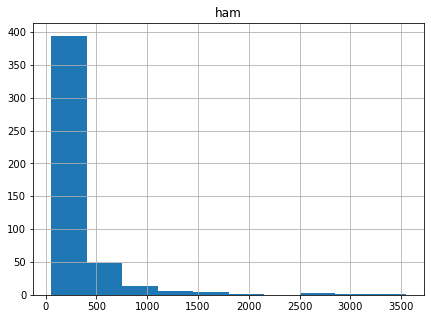

In [163]:
result.hist(column='ham', figsize=(7,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5C9EFAA60>]],
      dtype=object)

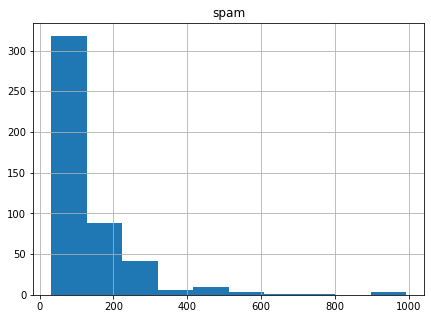

In [164]:
result.hist(column='spam', figsize=(7,5))

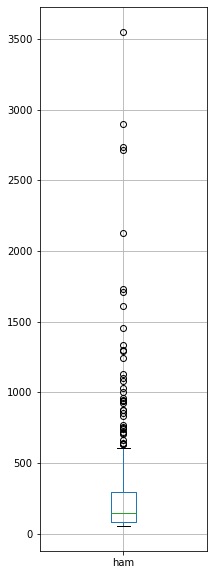

In [165]:
result.boxplot(column='ham', figsize=(3,10))

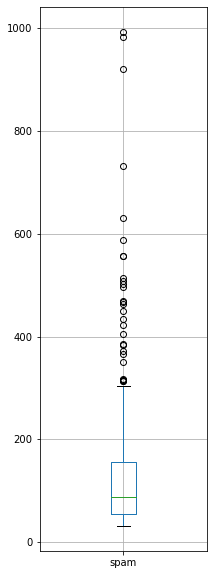

In [166]:
result.boxplot(column='spam', figsize=(3,10))

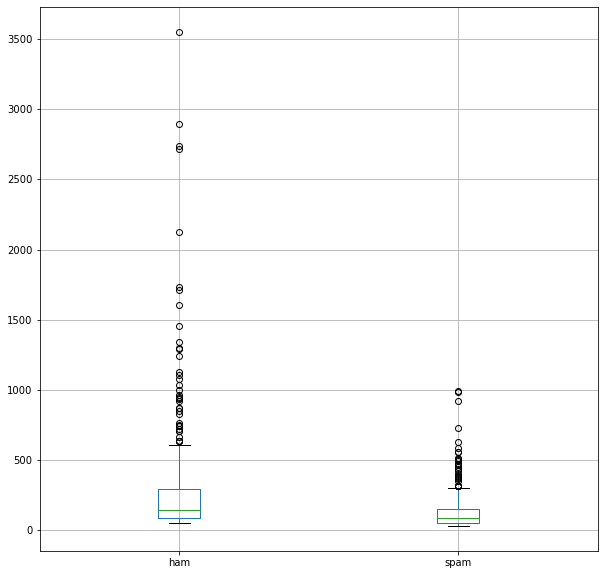

In [167]:

result.plot.box(grid='True', figsize=(10,10))



### Plot all words 

Here we can visualise on the y axis the frequency of each words in spam category, and y axis the frequency of ham words

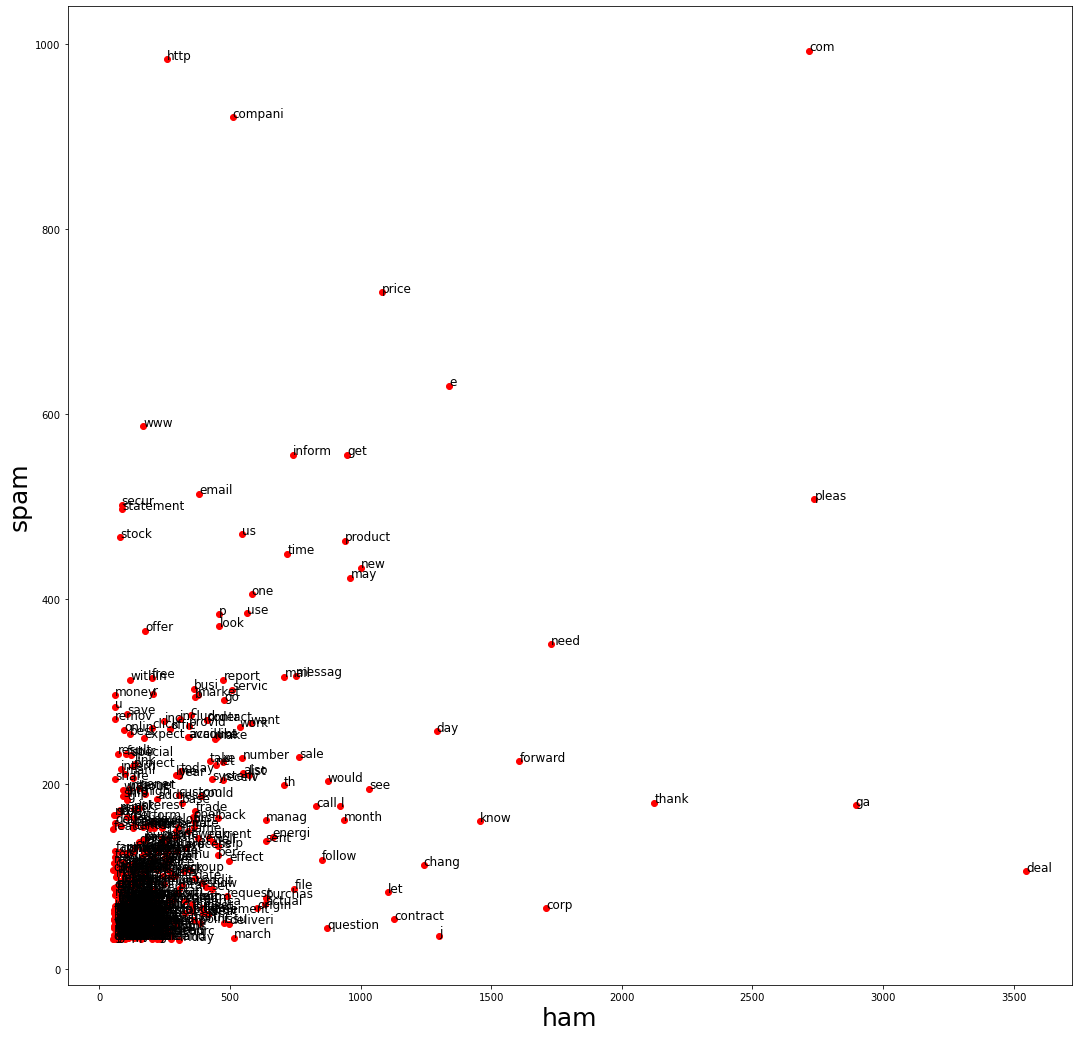

In [168]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(18,18))
# simulating a pandas df['type'] column
types = list(result[0])
x_coords = list(result['ham'])
y_coords = list(result['spam'])

plt.xlabel('ham', fontsize=25)
plt.ylabel('spam', fontsize=25)
 
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=12)
plt.show()

## if we remove the words in the middle, it is better to see the classification of some words


In [169]:
h_y=result[result['ham']>800]

In [170]:
s_x=result[result['spam']>250]

In [171]:
intersected_df = pd.merge(h_y, s_x, how='outer')

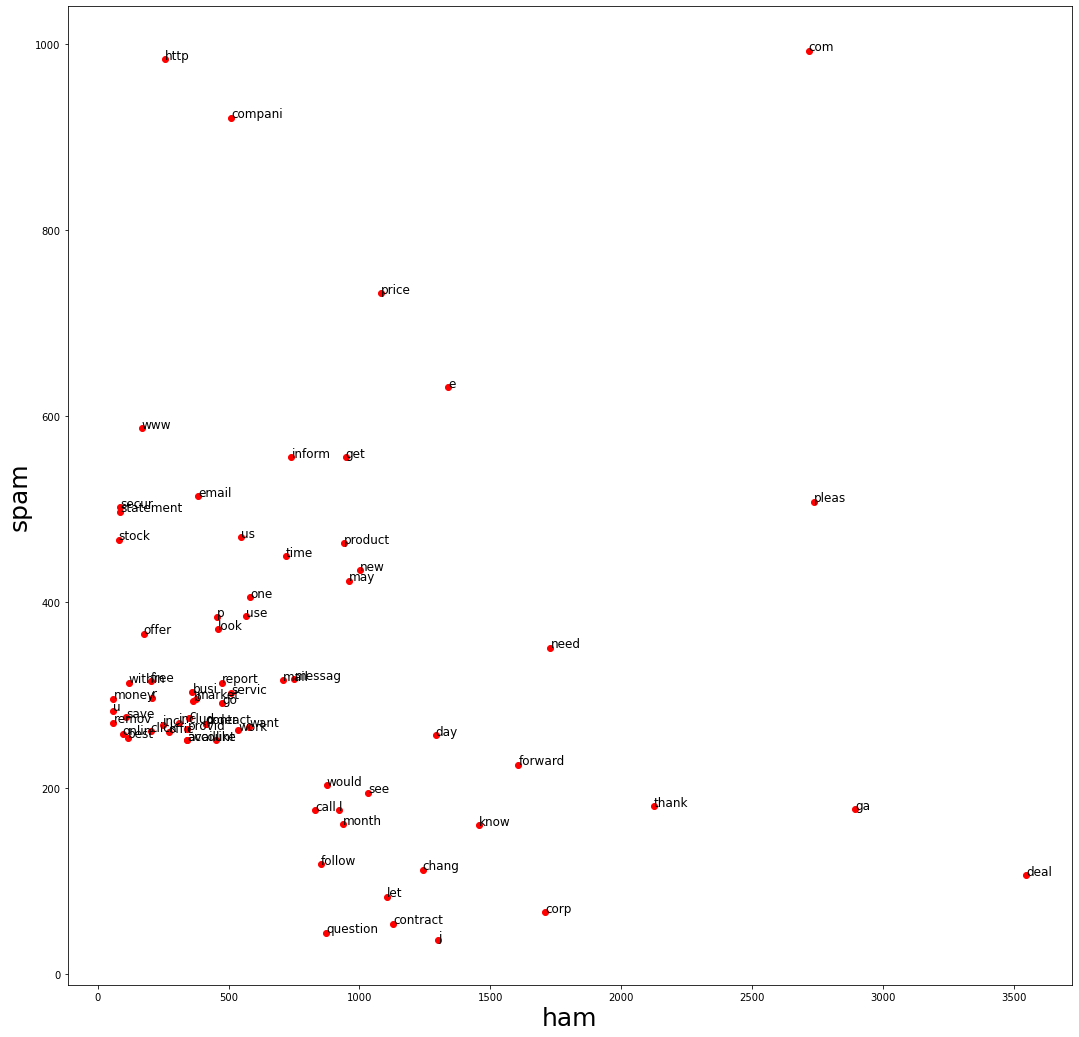

In [172]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(18,18))
# simulating a pandas df['type'] column
types = list(intersected_df[0])
x_coords = list(intersected_df['ham'])
y_coords = list(intersected_df['spam'])

plt.xlabel('ham', fontsize=25)
plt.ylabel('spam', fontsize=25)
 
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=12)
plt.show()

# Example of suport vector machine

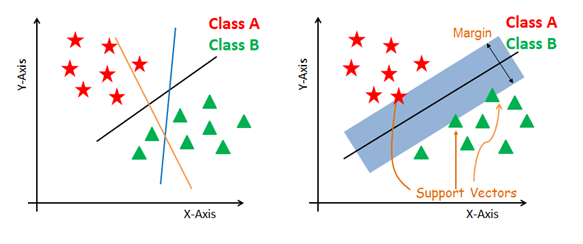

### The 30 most frequent words considering all dataset (spam and ham emails)

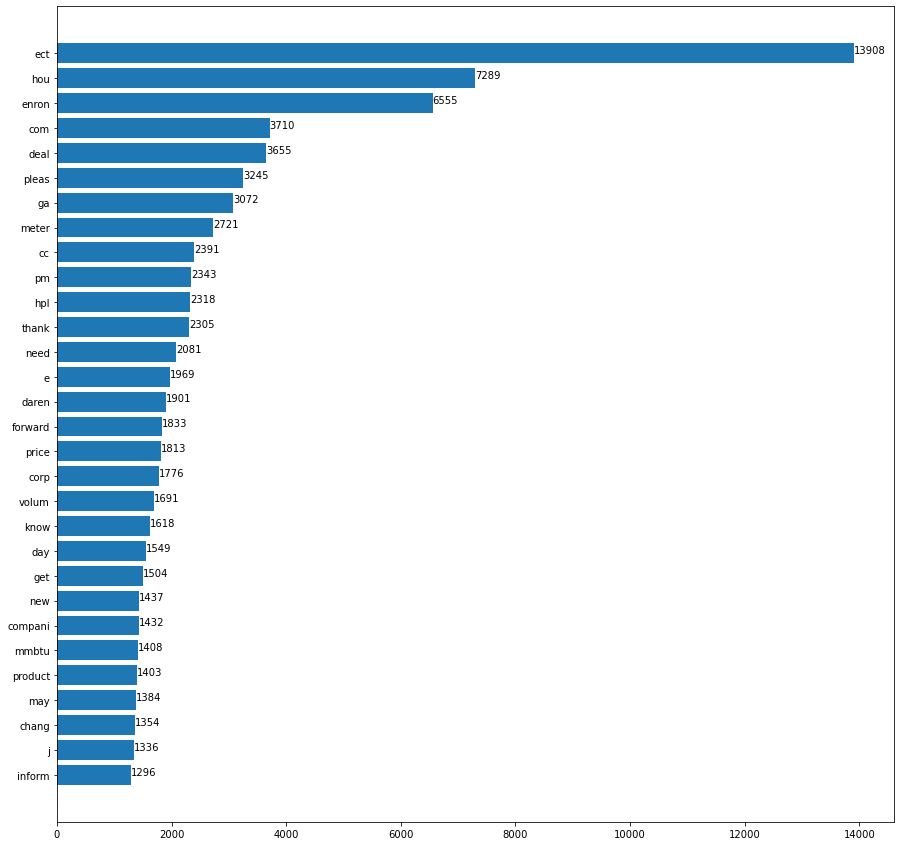

In [173]:
df = pd.DataFrame(all_words.most_common(30)) #[10:30]
df=df.sort_values(by=1, ascending=True)

plt.subplots(figsize=(15,15))
x = list(df[0])
y = list(df[1])
plt.barh(x, y)


for index, value in enumerate(y):
    plt.text(value, index, str(value))

### The 30 most frequent words considering just SPAM words

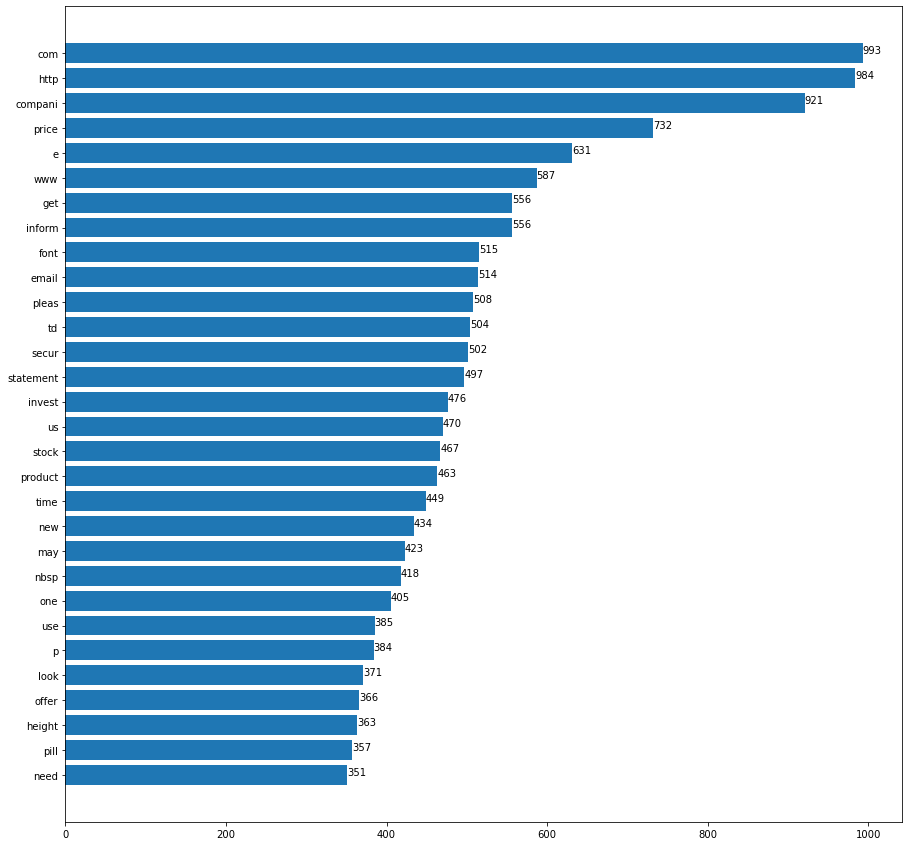

In [174]:
df_spam = pd.DataFrame(spam_words.most_common(30)) #[10:30]
df_spam=df_spam.sort_values(by=1, ascending=True)

plt.subplots(figsize=(15,15))
x = list(df_spam[0])
y = list(df_spam[1])
plt.barh(x, y)


for index, value in enumerate(y):
    plt.text(value, index, str(value))

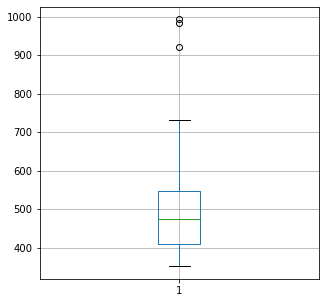

In [175]:
df_spam.plot.box(grid='True', figsize=(5,5))

### The 30 most frequent words considering HAM words

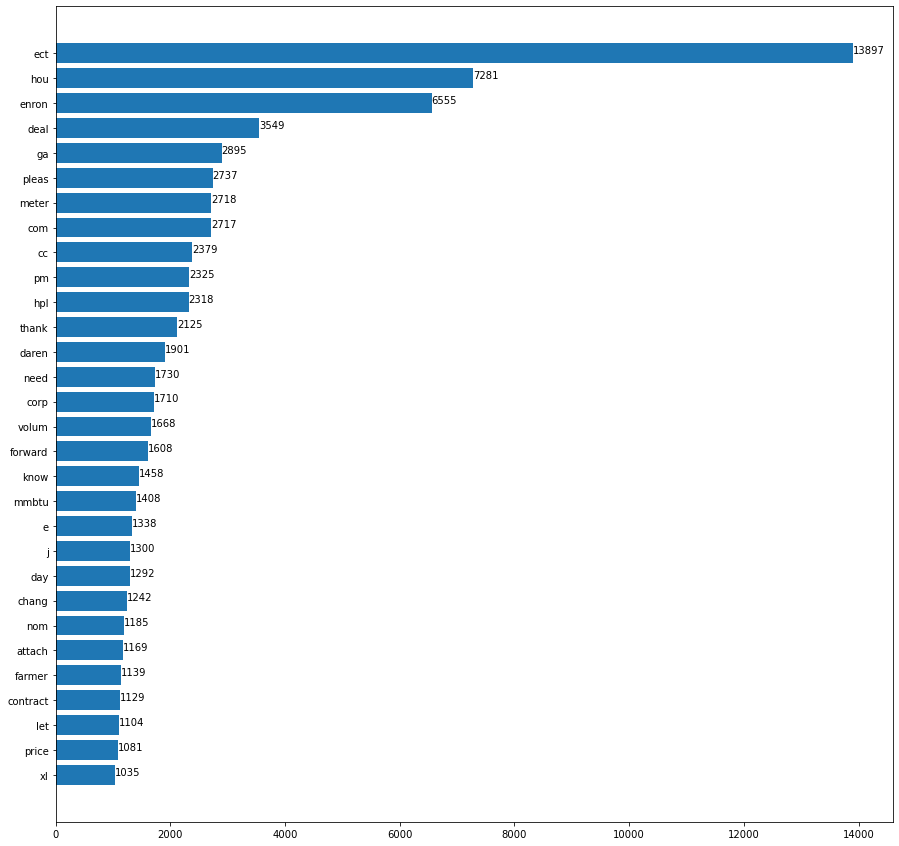

In [176]:
df_ham = pd.DataFrame(ham_words.most_common(30)) #[10:30]
df_ham=df_ham.sort_values(by=1, ascending=True)

plt.subplots(figsize=(15,15))
x = list(df_ham[0])
y = list(df_ham[1])
plt.barh(x, y)


for index, value in enumerate(y):
    plt.text(value, index, str(value))

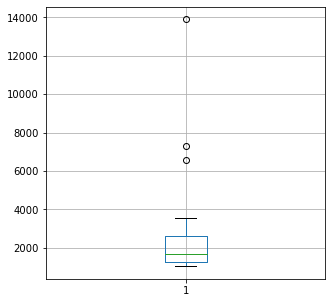

In [177]:
df_ham.plot.box(grid='True', figsize=(5,5))

In [178]:
!pip install wordcloud

converting Spam text emails into words

In [179]:
Spam_w=[]
for i in spam_text:
    Spam_w.append(i)
    

In [180]:
len(Spam_w)

1500

converting Ham text emails into words

In [181]:
Ham_w=[]
for i in ham_text:
    Ham_w.append(i)
    

### Create a word cloud winth spam words

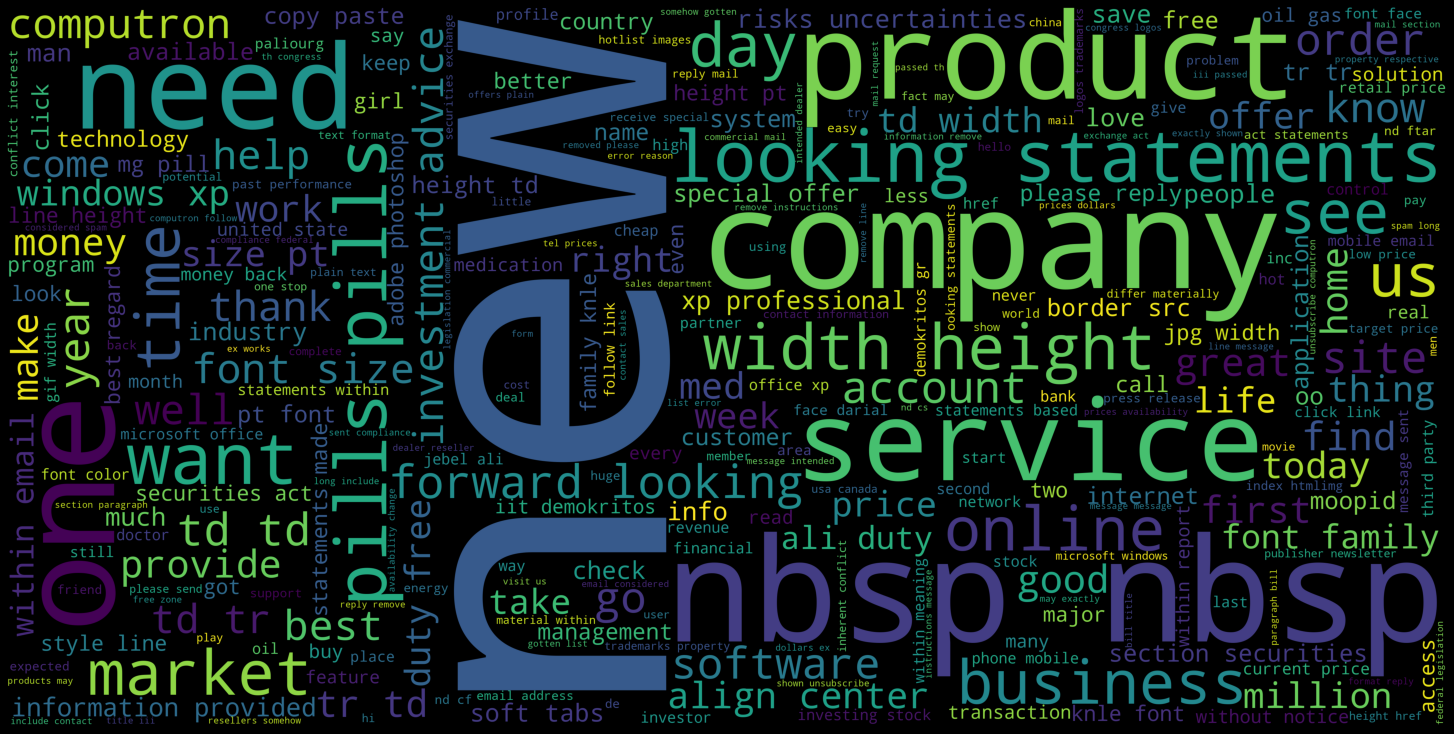

In [182]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=5000, height=2500,max_words=300)
wordcloud.generate(str(Spam_w))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Create a word cloud winth ham words

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=5000, height=2500,max_words=300)
wordcloud.generate(str(Ham_w))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))


In [ ]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [ ]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(message_cleaned[0])
for key, value in features.items():
    if value == True:
        print(key)

In [ ]:
# Now lets do it for all the messages
messages = list(zip(message_cleaned, Y))
#test_data = list(zip(test_inputs, te_d[1]))

In [ ]:
len(Remove_dup_lines(messages))

In [ ]:
# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

In [ ]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.30, random_state=seed)

In [ ]:
total=len(training)+len(testing)

print("Training",round(len(training)/total*100),"% = ", len(training))
print("Testing",round(len(testing)/total*100),"% = ",len(testing))

### 4. Scikit-Learn Classifiers with NLTK



Text classification can be described as assigning texts to an appropriate bucket. 
To train a text classifier, we need some annotated data. This training data can be obtained through several methods. considering this case. We  label the email in the inbox folder as Ham and the contents of spam folder as SPAM.

In [ ]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

In [ ]:
# make class label prediction for testing set
txt_features, labels = list(zip(*testing))

prediction = model.classify_many(txt_features)

In [ ]:
# print a confusion matrix and a classification report

from sklearn.metrics import confusion_matrix

confunsion_matrix = pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

In [ ]:
confunsion_matrix

In [ ]:
confunsion_matrix.plot()

In [ ]:
confunsion_matrix.columns

### 5. Lets compare with different models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

## sklearn.neighbors

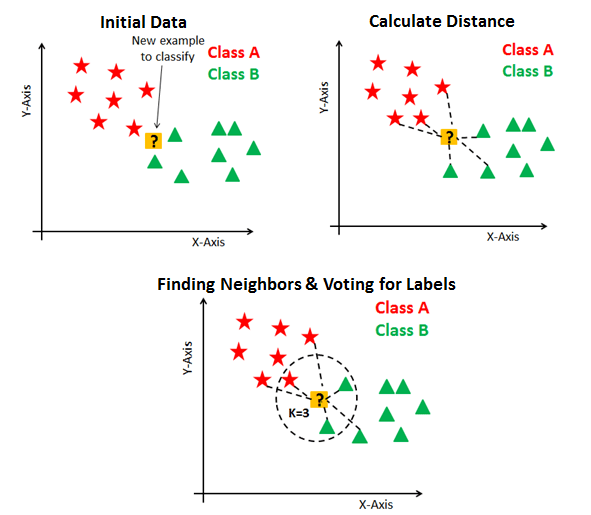

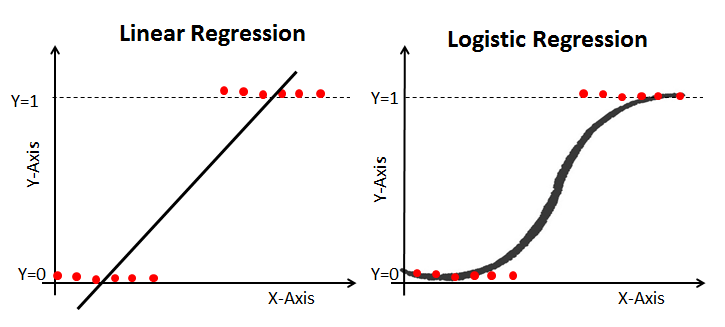

## naive_bayes

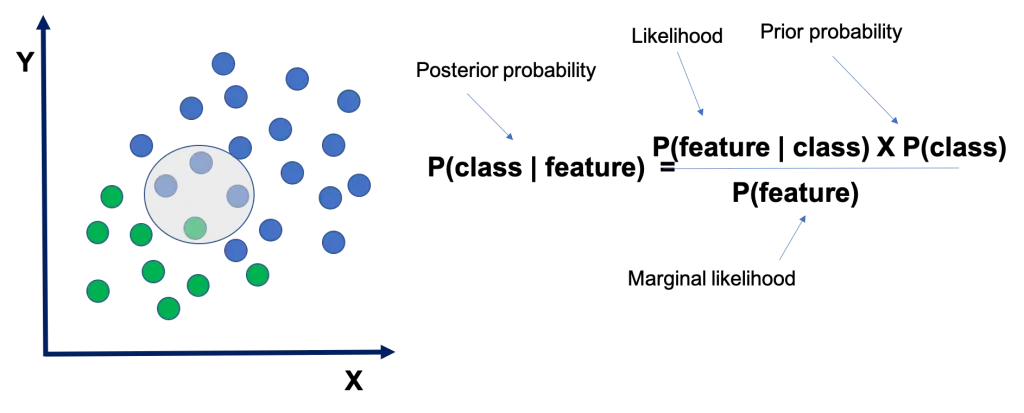

# Ensemble methods - Voting classifier

In [ ]:

from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'soft', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

In [ ]:

from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

In [ ]:
nltk_ensemble

In [ ]:
print(models)

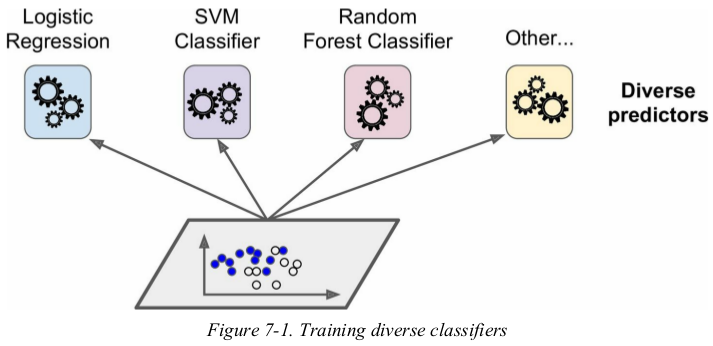

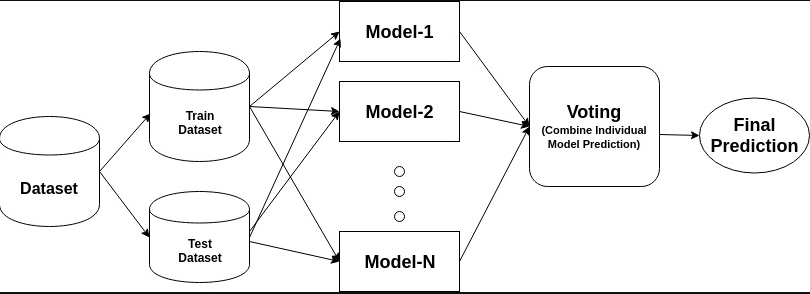

In [ ]:
# make class label prediction for testing set
txt_features, labels = list(zip(*testing))

prediction = nltk_ensemble.classify_many(txt_features)

In [ ]:
# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

# out of sample error 

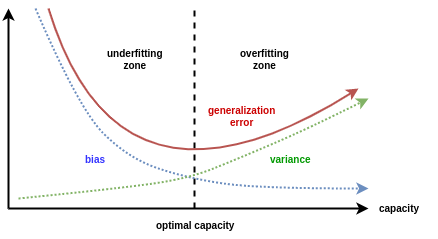


Voting ensemble estimates multiple base models and uses voting to combine the individual predictions to arrive at the final ones, we can train different models, for example, a Decision Tree and a Logistic Regression, and then use the Voting Ensemble to combine the results.
We have wo types of voting:
Hard voting makes the final prediction by a simple majority vote for accuracy.
Soft Voting happens when all your classifiers can calculate probabilities for the outcomes. It arrives at the best result by averaging out the probabilities calculated by individual algorithms.
